In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

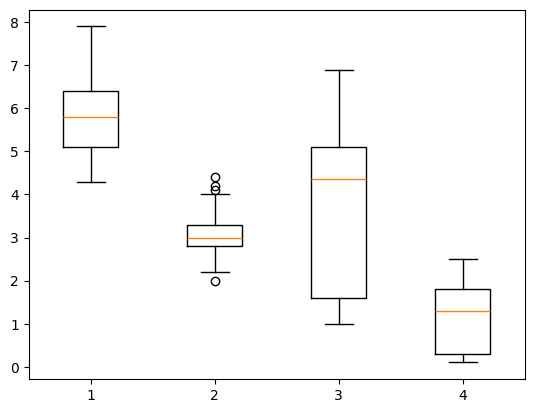

In [6]:
plt.boxplot(X)
plt.show()

In [7]:
X.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

In [8]:
#Got outlier in 2nd column, so we need to fix that

out_col = X.iloc[:,1]
Q1 = out_col.quantile(0.25)
Q3 = out_col.quantile(0.75)
IQR = Q3-Q1

out_numbers = out_col.loc[(out_col<Q1 - 1.5*IQR) | (out_col>Q3+1.5*IQR)]
# print(out_numbers.info())
print(out_col.median())
replaced_col = np.where((out_col<Q1 - 1.5*IQR) | (out_col>Q3+1.5*IQR), out_col.median(), out_col)

3.0


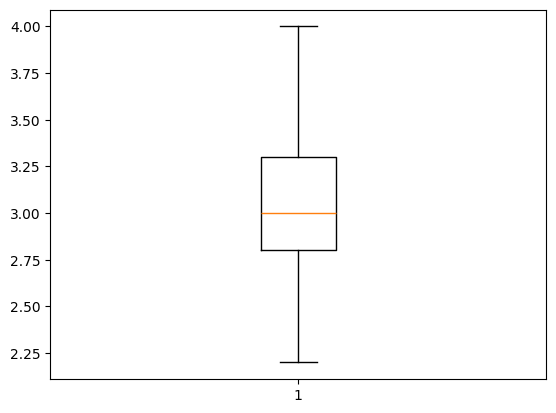

In [9]:
plt.boxplot(pd.Series(replaced_col))
plt.show()

In [10]:
X['SepalWidthCm'] = pd.Series(replaced_col)

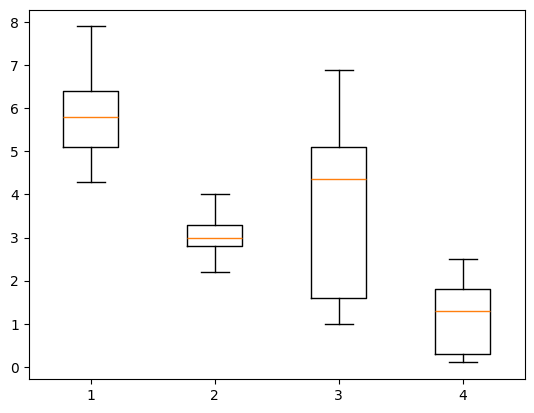

In [11]:
plt.boxplot(X)
plt.show()

## **Applying PCA Algorithm**

In [12]:
X_0mean = X - X.mean()
X_0mean.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-3.315866e-16,-2.368476e-17,4.736952e-16,-9.473903e-17
std,8.280661e-01,3.898511e-01,1.764420e+00,7.631607e-01
min,-1.543333e+00,-8.360000e-01,-2.758667e+00,-1.098667e+00
25%,-7.433333e-01,-2.360000e-01,-2.158667e+00,-8.986667e-01
50%,-4.333333e-02,-3.600000e-02,5.913333e-01,1.013333e-01
75%,5.566667e-01,2.640000e-01,1.341333e+00,6.013333e-01
max,2.056667e+00,9.640000e-01,3.141333e+00,1.301333e+00


In [13]:
X.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.036067,1.273682,0.516904
SepalWidthCm,-0.036067,0.151984,-0.266556,-0.095656
PetalLengthCm,1.273682,-0.266556,3.113179,1.296387
PetalWidthCm,0.516904,-0.095656,1.296387,0.582414


In [14]:
C = np.matmul(X_0mean.T,X_0mean)

In [15]:
C # real covvariance matrix = C/149

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.036067,1.273682,0.516904
SepalWidthCm,-0.036067,0.151984,-0.266556,-0.095656
PetalLengthCm,1.273682,-0.266556,3.113179,1.296387
PetalWidthCm,0.516904,-0.095656,1.296387,0.582414


In [93]:
eign_vec = np.linalg.eig(C).eigenvectors
eign_vec

array([[ 0.36256148, -0.71025936, -0.5363965 ,  0.27633243],
       [-0.06789732, -0.66565722,  0.67154329, -0.31830808],
       [ 0.85726975,  0.20451144,  0.06774171, -0.46762667],
       [ 0.35920426,  0.10299118,  0.50667491,  0.77694637]])

In [94]:
eign_vec[:,0]

array([ 0.36256148, -0.06789732,  0.85726975,  0.35920426])

In [95]:
eign_val = np.linalg.eig(C).eigenvalues
eign_val

array([628.20828686,  31.31901143,  12.17803191,   3.75206979])

In [96]:
np.dot(C,eign_vec[:,0].reshape((4,1)))

array([[227.76412592],
       [-42.65365869],
       [538.54396341],
       [225.65508969]])

In [97]:
628*eign_vec[:,0]

array([227.68860912, -42.63951657, 538.36540538, 225.58027216])

In [98]:
order_ind = np.argsort(eign_val)[::-1]

In [99]:
d_eig_vec = eign_vec[:, order_ind][:,:2]
d_eig_vec

array([[ 0.36256148, -0.71025936],
       [-0.06789732, -0.66565722],
       [ 0.85726975,  0.20451144],
       [ 0.35920426,  0.10299118]])

In [100]:
X_proj = np.matmul(X, d_eig_vec)
X_proj

,0,1
0,2.883441,-5.645209
1,2.844878,-5.170328
2,2.673059,-5.181859
3,2.815047,-5.003365
4,2.840396,-5.640749
...,...,...
145,7.509442,-5.455370
146,7.083231,-4.920537
147,7.329169,-5.344216
148,7.472457,-5.325601


## D

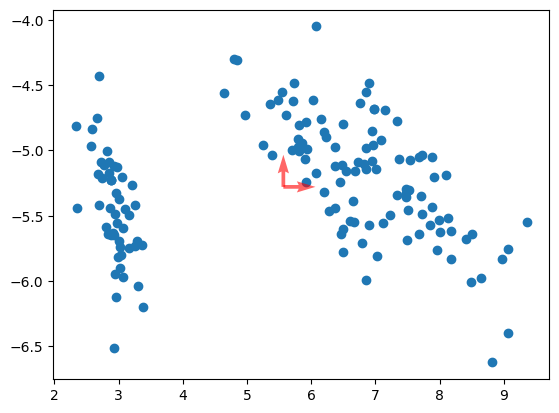

In [101]:
plt.scatter(X_proj.iloc[:,0], X_proj.iloc[:,1])
plt.savefig("scatter.png")

dp_00 = np.dot(d_eig_vec[:,0], d_eig_vec[:,0])
dp_01 = np.dot(d_eig_vec[:,0], d_eig_vec[:,1])
dp_10 = np.dot(d_eig_vec[:,1], d_eig_vec[:,0])
dp_11 = np.dot(d_eig_vec[:,1], d_eig_vec[:,1])
plt.quiver(X_proj.iloc[:,0].mean(), X_proj.iloc[:,1].mean(),  dp_00,dp_01 , scale_units='x', scale=2, color='red',alpha=0.6)
plt.quiver(X_proj.iloc[:,0].mean(), X_proj.iloc[:,1].mean(), dp_10 ,dp_11 , scale_units='x', scale=2, color='red',alpha=0.6)
plt.show()

## e

In [102]:
X_reverted =np.matmul(X_proj,d_eig_vec.T)
# np.matmul(d_eig_vec, d_eig_vec.T)
X_reverted

,0,1,2,3
0,5.054987,3.561996,1.317377,0.454338
1,4.703717,3.248507,1.381436,0.489394
2,4.649612,3.267848,1.231783,0.426488
3,4.574314,3.139392,1.390009,0.495874
4,5.036212,3.561950,1.281388,0.439335
...,...,...,...,...
145,6.597362,3.121535,5.321932,2.135569
146,6.062964,2.794458,5.065934,2.037555
147,6.453053,3.059785,5.190122,2.082262
148,6.491783,3.037665,5.316765,2.135648


In [103]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [104]:
X_reverted.iloc(axis=1)[0]

0      5.054987
1      4.703717
2      4.649612
3      4.574314
4      5.036212
         ...   
145    6.597362
146    6.062964
147    6.453053
148    6.491783
149    6.043530
Name: 0, Length: 150, dtype: float64

In [105]:
RMSE = []
for i in range(len(X.columns)):
    # sum = np.dot(((X_reverted.iloc(axis=1)[i] - X.iloc(axis=1)[i]).to_numpy())**2, np.ones((150,)))
    sum = (X_reverted.iloc(axis=1)[i].to_numpy() - X.iloc(axis=1)[i].to_numpy())**2
    # print(sum)
    sum = np.mean(sum)
    # RMSE.append(sum/150)    
    RMSE.append(sum**0.5)    

In [106]:
RMSE

[0.17623877643378572,
 0.2217789858385207,
 0.1019276341828629,
 0.31909806999928286]

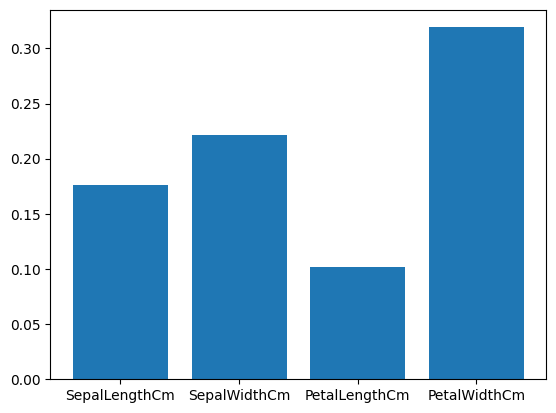

In [107]:
plt.bar(X.columns,RMSE)
plt.savefig('RMSE.png')
plt.show()

# **Question II**

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy import stats

In [109]:
df_proj = X_proj
# df_proj.columns = X.columns[:2]
df_proj['Species'] = y
df_proj

,0,1,Species
0,2.883441,-5.645209,Iris-setosa
1,2.844878,-5.170328,Iris-setosa
2,2.673059,-5.181859,Iris-setosa
3,2.815047,-5.003365,Iris-setosa
4,2.840396,-5.640749,Iris-setosa
...,...,...,...
145,7.509442,-5.455370,Iris-virginica
146,7.083231,-4.920537,Iris-virginica
147,7.329169,-5.344216,Iris-virginica
148,7.472457,-5.325601,Iris-virginica


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_proj, y, random_state=104, test_size=0.2, shuffle=True)

In [111]:
def Mode(arr:np.array):
    unique, counts = np.unique(arr,return_counts=True)
    return unique[np.argmax(counts)]

In [112]:
y_pred = []
for i in range(len(X_test.index)):
    mypt = X_test.iloc[i].to_numpy()[:2]
    # print(mypt)
    dist_lst = []
    for j in range(len(X_train.index)):
        t_pt = X_train.iloc[j].to_numpy()[:2]
        dist = (mypt - t_pt)**2
        dist = np.sqrt(np.sum(dist))
        dist_lst.append([dist,j])
    dist_lst = (np.array(sorted(dist_lst)))[:5]
    labels_lst = y_train.iloc[dist_lst[:,1]].to_numpy()
    # print(dist_lst)
    y_pred.append(Mode(labels_lst))
    # print(labels_lst)
    # print(dist_lst)



In [113]:
y_test.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [114]:
X_test

,0,1,Species
31,3.156567,-5.750671,Iris-setosa
18,3.373710,-6.199409,Iris-setosa
10,3.064357,-5.970967,Iris-setosa
64,5.386579,-5.037729,Iris-versicolor
134,7.338689,-4.773839,Iris-virginica
68,6.495027,-4.793266,Iris-versicolor
54,6.648784,-5.385287,Iris-versicolor
147,7.329169,-5.344216,Iris-virginica
89,5.720389,-4.618635,Iris-versicolor
35,2.696101,-5.415388,Iris-setosa


In [115]:
predicted= X_test.iloc[:,:-1]
predicted.insert(2,"species_pred" ,y_pred)
predicted

,0,1,species_pred
31,3.156567,-5.750671,Iris-setosa
18,3.373710,-6.199409,Iris-setosa
10,3.064357,-5.970967,Iris-setosa
64,5.386579,-5.037729,Iris-versicolor
134,7.338689,-4.773839,Iris-virginica
68,6.495027,-4.793266,Iris-versicolor
54,6.648784,-5.385287,Iris-versicolor
147,7.329169,-5.344216,Iris-virginica
89,5.720389,-4.618635,Iris-versicolor
35,2.696101,-5.415388,Iris-setosa


In [116]:
y_test


31         Iris-setosa
18         Iris-setosa
10         Iris-setosa
64     Iris-versicolor
134     Iris-virginica
68     Iris-versicolor
54     Iris-versicolor
147     Iris-virginica
89     Iris-versicolor
35         Iris-setosa
34         Iris-setosa
88     Iris-versicolor
75     Iris-versicolor
135     Iris-virginica
61     Iris-versicolor
45         Iris-setosa
50     Iris-versicolor
86     Iris-versicolor
105     Iris-virginica
20         Iris-setosa
96     Iris-versicolor
46         Iris-setosa
109     Iris-virginica
23         Iris-setosa
143     Iris-virginica
71     Iris-versicolor
5          Iris-setosa
30         Iris-setosa
0          Iris-setosa
74     Iris-versicolor
Name: Species, dtype: object

In [117]:
y_pred

['Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor']

In [118]:
cm = confusion_matrix(y_test, y_pred)

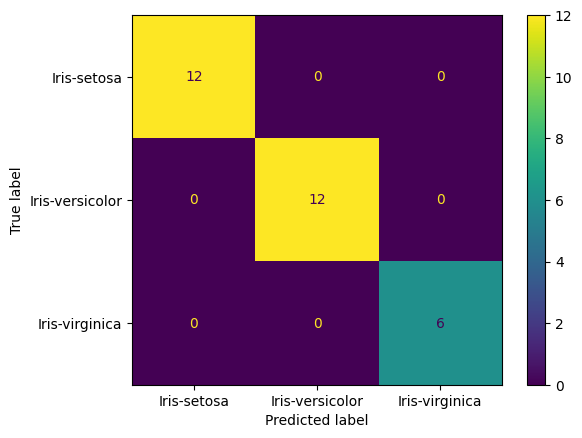

In [119]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.savefig("cm.png")
plt.show()